<a href="https://colab.research.google.com/github/eatsleepeat/earth-hacks/blob/master/Earth_Hacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans




In [0]:
from google.colab import files
uploaded = files.upload()

Saving covid_short.csv to covid_short.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['covid_short.csv']))

In [0]:
df2.head(5)

,id,gender,age,visiting Wuhan,from Wuhan,death,recovered,Unnamed: 7
0,1,0,66.0,1,0,0,0,NaN
1,2,1,56.0,0,1,0,0,NaN
2,3,0,46.0,0,1,0,0,NaN
3,4,1,60.0,1,0,0,0,NaN
4,5,0,58.0,0,0,0,0,NaN


In [0]:
### Get all the features columns except the class
features = list(df2.columns)[:-1]

### Get the features data
data = df2[features]

In [0]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)


In [0]:
data



,id,gender,age,visiting Wuhan,from Wuhan,death,recovered,clusters
0,1,0,66.0,1,0,0,0,0
1,2,1,56.0,0,1,0,0,0
2,3,0,46.0,0,1,0,0,0
3,4,1,60.0,1,0,0,0,0
4,5,0,58.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
838,1053,1,45.0,0,0,0,0,1
839,1080,0,24.0,0,0,0,0,1
840,1081,0,24.0,0,0,0,0,1
841,1082,0,35.0,0,0,0,0,1


In [0]:
print(df2)
df2.head(5)
df3=df2.drop(df2.columns[8], axis=1)
df3=df3.drop(df3.columns[7], axis=1)
print(df3)


       id  gender   age  visiting Wuhan  ...  death  recovered  Unnamed: 7 clusters
0       1       0  66.0               1  ...      0          0         NaN        1
1       2       1  56.0               0  ...      0          0         NaN        1
2       3       0  46.0               0  ...      0          0         NaN        1
3       4       1  60.0               1  ...      0          0         NaN        1
4       5       0  58.0               0  ...      0          0         NaN        1
..    ...     ...   ...             ...  ...    ...        ...         ...      ...
838  1053       1  45.0               0  ...      0          0         NaN        1
839  1080       0  24.0               0  ...      0          0         NaN        1
840  1081       0  24.0               0  ...      0          0         NaN        1
841  1082       0  35.0               0  ...      0          0         NaN        1
842  1085       0  70.0               0  ...      0          0         NaN  

In [0]:
df3.head(3)

,id,gender,age,visiting Wuhan,from Wuhan,death,recovered
0,1,0,66.0,1,0,0,0
1,2,1,56.0,0,1,0,0
2,3,0,46.0,0,1,0,0


In [0]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

clmns = ['id', 'gender','age', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered']
df_tr_std = stats.zscore(df3[clmns])

In [0]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
df3['clusters'] = labels

print(df3)

       id  gender   age  visiting Wuhan  from Wuhan  death  recovered  clusters
0       1       0  66.0               1           0      0          0         1
1       2       1  56.0               0           1      0          0         1
2       3       0  46.0               0           1      0          0         1
3       4       1  60.0               1           0      0          0         1
4       5       0  58.0               0           0      0          0         1
..    ...     ...   ...             ...         ...    ...        ...       ...
838  1053       1  45.0               0           0      0          0         1
839  1080       0  24.0               0           0      0          0         1
840  1081       0  24.0               0           0      0          0         1
841  1082       0  35.0               0           0      0          0         1
842  1085       0  70.0               0           0      0          0         1

[843 rows x 8 columns]


In [0]:
#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(df3[clmns].groupby(['clusters']).mean())

                  id    gender        age  ...  from Wuhan  death  recovered
clusters                                   ...                              
0         134.595238  0.285714  70.119048  ...    0.761905    1.0   0.000000
1         492.961298  0.420724  48.401685  ...    0.149813    0.0   0.181024

[2 rows x 7 columns]


Text(33.762971875000005, 0.5, 'from Wuhan')

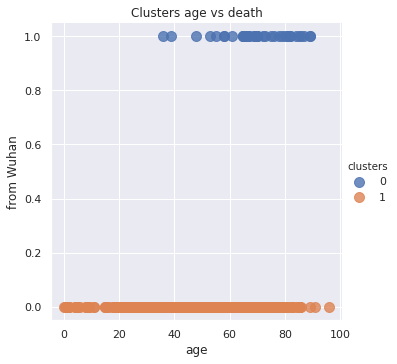

In [0]:
sns.lmplot('age', 'death', 
           data=df3, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters age vs death')
plt.xlabel('age')
plt.ylabel('from Wuhan')

Text(0, 0.5, 'gender')

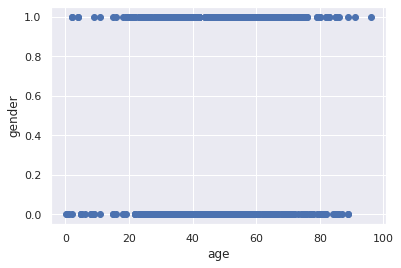

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

plt.scatter(data['age'],data['gender'])
plt.xlabel('age')
plt.ylabel('gender')


In [0]:
x=data.copy()
kmeas=KMeans(2)
kmeas.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:

clusters=x.copy()
clusters['cluster_pred']=kmeas.fit_predict(x)


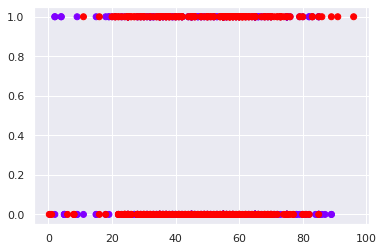

In [0]:
plt.scatter(clusters['age'],clusters['gender'],c=clusters['cluster_pred'],cmap='rainbow')
plt.show()


In [0]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

NameError: ignored